# Table of contents

1. Import libraries
2. Import data set(s)
3. Consistency checks & prep data
4. Explore relationships

# 1. Import libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [56]:
# Check matplotlib version
matplotlib.__version__

'3.5.2'

In [57]:
# Show charts directly in notebook without calling them
%matplotlib inline

# 2. Import data set(s)

In [58]:
# Define path
path = r'/Users/elisabetta/Documents/01-2023 Used Boats'

In [59]:
# Import cvs file
df_boats = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_cleaned_2.csv'), index_col = False)

# 3. Consistency checks & prep data

In [60]:
# Check import
df_boats.head()

,boat_id,price,boat_type,manufacturer,type,year_built,length,length_cm,length_mm,width,width_cm,width_mm,material,location,num_views_last_7_days
0,7402,53754,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.00,600,6000,2.50,250,2500,GRP,Germany,131
1,7105,60753,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.10,610,6100,2.50,250,2500,GRP,Germany,69
2,7280,61079,Sport Boat,Regal power boats,"new boat from stock,Unleaded",2021,6.00,600,6000,2.50,250,2500,GRP,Switzerland,285
3,1147,61713,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.10,610,6100,2.50,250,2500,GRP,Germany,110
4,5798,123468,Sport Boat,Sessa power boats,"new boat from stock,Unleaded",2021,8.42,842,8420,2.64,264,2640,GRP,Switzerland,185


In [61]:
df_boats.shape

(2118, 15)

In [62]:
df_boats.dtypes

boat_id                    int64
price                      int64
boat_type                 object
manufacturer              object
type                      object
year_built                 int64
length                   float64
length_cm                  int64
length_mm                  int64
width                    float64
width_cm                   int64
width_mm                   int64
material                  object
location                  object
num_views_last_7_days      int64
dtype: object

In [63]:
# Check for missing values
df_boats.isnull().sum()
# Columns with null values will not affect this analysis. Leave as is for now

boat_id                    0
price                      0
boat_type                  0
manufacturer             309
type                       0
year_built                 0
length                     0
length_cm                  0
length_mm                  0
width                      0
width_cm                   0
width_mm                   0
material                 315
location                   0
num_views_last_7_days      0
dtype: int64

In [64]:
# Check for duplicates
dups = df_boats.duplicated()
dups.sum()
# No duplicates

0

# 4. Explore relationships

4.1 Correlation Matrix Heatmap

In [65]:
# Create a correlation matrix using seaborn
# First check columns
df_boats.columns

Index(['boat_id', 'price', 'boat_type', 'manufacturer', 'type', 'year_built',
       'length', 'length_cm', 'length_mm', 'width', 'width_cm', 'width_mm',
       'material', 'location', 'num_views_last_7_days'],
      dtype='object')

In [66]:
# Then create a subset with the variables to display in the matrix
subset = df_boats[['price', 'year_built', 'length', 'width', 'num_views_last_7_days']]

In [67]:
# Check output
subset

,price,year_built,length,width,num_views_last_7_days
0,53754,2021,6.00,2.50,131
1,60753,2021,6.10,2.50,69
2,61079,2021,6.00,2.50,285
3,61713,2021,6.10,2.50,110
4,123468,2021,8.42,2.64,185
...,...,...,...,...,...
2113,58000,1906,14.80,2.80,66
2114,31000,1905,17.03,3.56,173
2115,15000,1902,20.70,5.50,207
2116,15000,1900,16.00,4.05,182


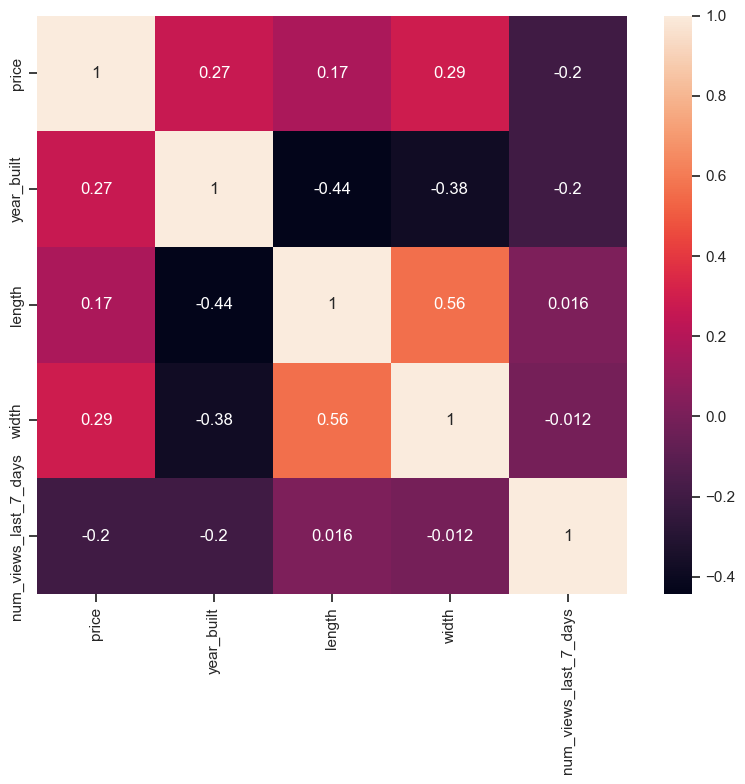

In [68]:
# Create a matrix with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create a correlation matrix heatmap in seaborn by applying a heatmap onto the predefined subplot and matrix
corr = sns.heatmap(subset.corr(), annot = True, ax = ax)
plt.tight_layout()

In [69]:
# The matrix shows weak positive correlations between price and, respectively, year_built, length, and width, suggesting that the newer the boat, and the bigger, the more it will cost
# There is an extremely weak negative correlation between price and the number of views. This indicates a tendency for cheaper boats to be viewed more often than expensive boats
# There is a moderate/weak negative correlation between year_built and length/width, suggesting that newer boats tend to be smaller
# Length and width obviously show a moderate positive correlation with each other >>> if a boat is longer it's probably be wider too

In [70]:
# Export matrix
corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'correlation_matrix.png'))

4.2 Scatterplots

<AxesSubplot:xlabel='price', ylabel='year_built'>

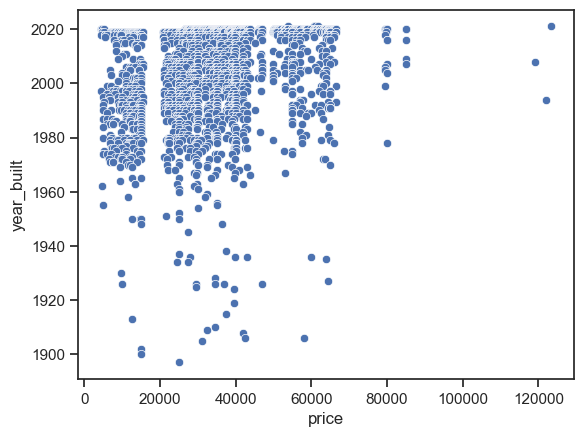

In [72]:
# Create scatterplot for price and year_built in seaborn
sns.scatterplot(x = 'price', y = 'year_built', data = df_boats)
# As we can see, most boats were built from the 70s on and cost 45k or less

<AxesSubplot:xlabel='price', ylabel='length'>

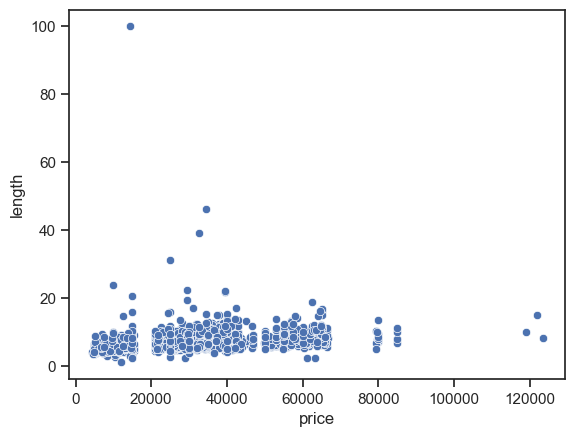

In [73]:
# Create scatterplot for price and length in seaborn
sns.scatterplot(x = 'price', y = 'length', data = df_boats)
# Most boats are 10 meters long or shorter, with just a few very long outliers
# A group of a few vey expensive outliers is visible

<AxesSubplot:xlabel='price', ylabel='width'>

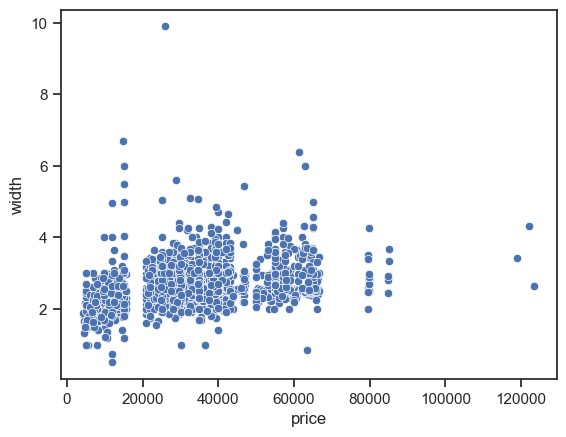

In [74]:
# Create scatterplot for price and width in seaborn
sns.scatterplot(x = 'price', y = 'width', data = df_boats)
# Boat width ranges on average between 1 and 4 meters, with just a few outliers and a few very pricey boats

<AxesSubplot:xlabel='price', ylabel='num_views_last_7_days'>

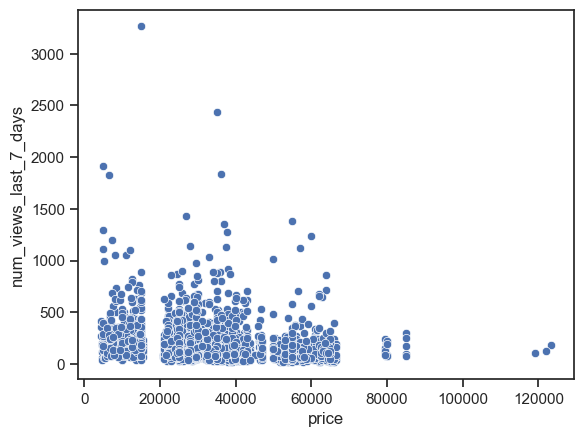

In [75]:
# Create scatterplot for price and numbers of views in seaborn
sns.scatterplot(x = 'price', y = 'num_views_last_7_days', data = df_boats)
# Views don't seem to be affecting price much as all the boats have very similar numbers of views, just with a few outliers

4.3 Pair plots

In [76]:
# Create subset with variables for the pair plot
subset_2 = subset[['price', 'year_built', 'length']]

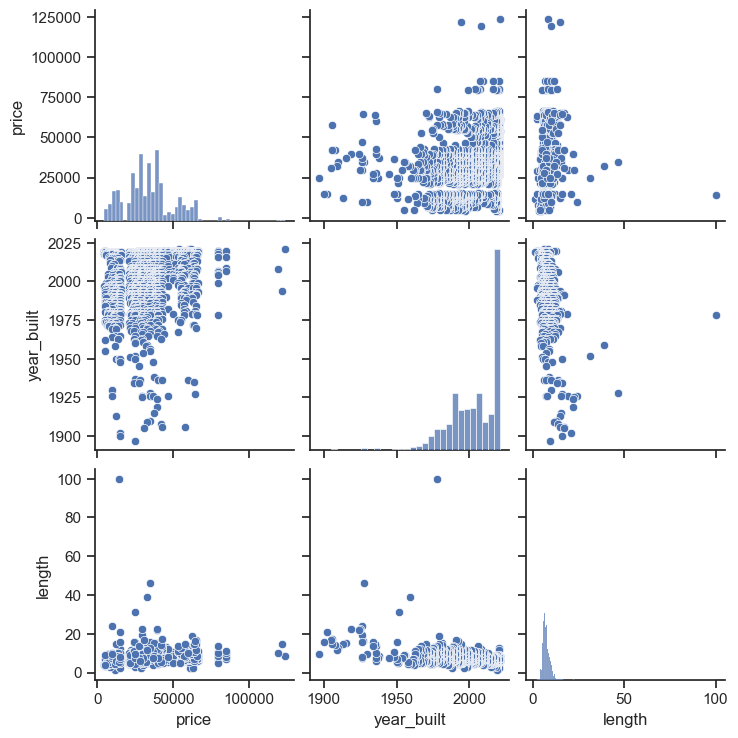

In [77]:
# Create pair plot 
g = sns.pairplot(subset_2)
# The pair plot makes it easier to visualise and understand what priviously discussed

4.4 Categorical plots

<AxesSubplot:xlabel='price', ylabel='Count'>

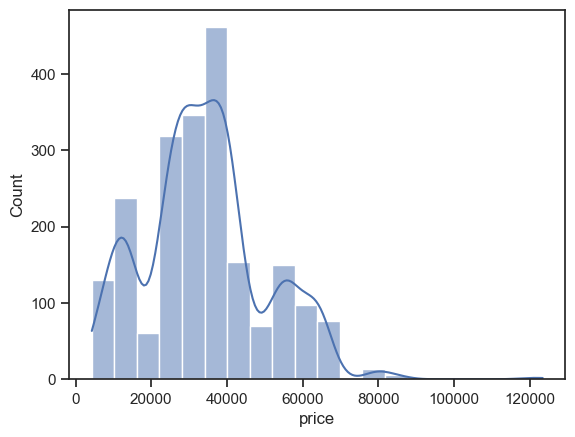

In [78]:
# Create histogram to visualize distribution of price to determine categories
sns.histplot(df_boats['price'], bins = 20, kde = True)

In [79]:
# Create categories
df_boats.loc[df_boats['price'] < 30000, 'price_category'] = 'Low'
df_boats.loc[(df_boats['price'] >= 30000) & (df_boats['price'] < 60000), 'price_category'] = 'Medium'
df_boats.loc[df_boats['price'] >= 60000, 'price_category'] = 'High'

In [80]:
# Check output
df_boats['price_category'].value_counts(dropna = False)

Medium    1054
Low        899
High       165
Name: price_category, dtype: int64

In [81]:
df_boats.columns

Index(['boat_id', 'price', 'boat_type', 'manufacturer', 'type', 'year_built',
       'length', 'length_cm', 'length_mm', 'width', 'width_cm', 'width_mm',
       'material', 'location', 'num_views_last_7_days', 'price_category'],
      dtype='object')

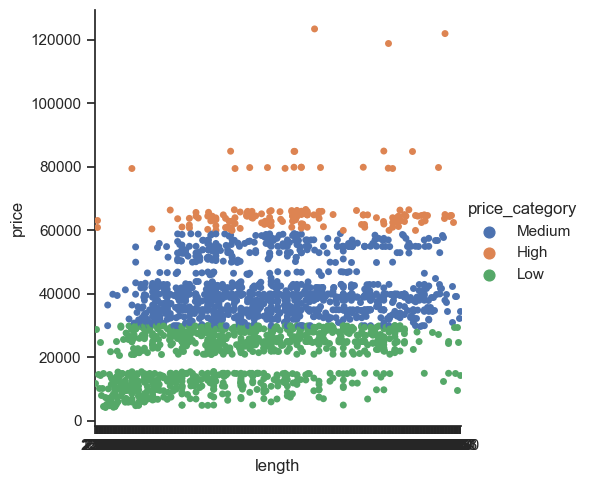

In [82]:
# Create a categorical plot in seaborn
sns.set(style="ticks")
catplot = sns.catplot(x="length", y="price", hue="price_category", data=df_boats)
# Boats with different price ranges are quite equally distributed across the length axis

In [84]:
# Export categorical plot
catplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'categorical_plot.png'))

4.5 Conclusions

In [87]:
# Construction year and length seem to be the factors that influcence the price most
# Width is dependant on length so it isn't that important
# Number of views seems to have a minor impact on the price, i.e. price remains the same irrespective of how often a boat is viewed